In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import neural_network
from sklearn import linear_model
from sklearn import tree
#import graphviz 
import numpy as np
from scipy import stats 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


# Etapa 1: Preprocesamiento

## Cargamos las bases de datos (excel)


In [4]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')


db_hepatopata = pd.read_excel('Hepatopata.xls')


db_oncologicos = pd.read_excel('Oncologicos.xls')


db_PTI = pd.read_excel('PTI.xls')

## Informacion de cada una de las db


In [5]:
#Informacion SMD
db_displasia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(9), object(8)
memory usage: 358.4+ KB


In [6]:
#Informacion Hepatopata
#db_hepatopata.info()

In [7]:
#Informacion oncologicos
#db_oncologicos.info()

In [8]:
#Informacion PTI
db_PTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(10), object(7)
memory usage: 172.8+ KB


## Limpieza de variables bajo supervision clinica y codificacion de etiquetas

In [9]:

db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [10]:
#Añadimos una nueva variable que identifique la patologia (SMD --> 0)

db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)

In [11]:
db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [12]:
#Añadimos una variable que identifique el diagnostico (HPT --> 1)
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

In [13]:
db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [14]:
#Añadimos una variable que identifique el diagnostico (ONC --> 2)
db_onc['Diagnosis']=np.full((303,1),2)

In [15]:

db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [16]:
#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)

## Fusionamos las bases de datos y representamos diagrama de cajas y bigotes

In [17]:
db_final = pd.concat([db_smd,db_hpt,db_onc,db_pti])

#db_final.info()

db_final = db_final.replace(np.nan ,np.mean(db_final['PLT']))




#db_final.plot(kind='box',subplots=True, layout= (10,10), sharex= False, sharey = False, figsize = (50,50))
#plt.show()

## Opcional: Eliminar los outliers utilizando z-score

In [18]:
#Obtenemos z-score

z = np.abs(stats.zscore(db_final))


#Establecemps un umbral 

threshold = 2
pos = np.where(z >threshold)

#Eliminamos los outliers identificados por z-score 

db_final = db_final[(z < threshold).all(axis=1)]

## Aleatorizamos y realizamos las particiones (Train y Validacion)

In [19]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']
y_vals = np.eye(len(set(y)))[y]


x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2, random_state=7)

y_test_cls = np.array([label.argmax() for label in y_test])

## Cargamos las bases de datos de Test (una por patologia)

In [20]:
db_displasia_test = pd.read_excel('smdtest.xls')


db_hepatopata_test = pd.read_excel('hpttest.xls')


db_oncologicos_test = pd.read_excel('oncotest.xls')


db_PTI_test = pd.read_excel('ptitest.xls')

## Limpieza de variables en test bajo supervision clinica y codificacion de etiquetas

In [21]:
db_smd_test = db_displasia_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_smd_test['Diagnosis']=np.zeros((10,1),dtype=np.int8)

db_hpt_test = db_hepatopata_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_hpt_test['Diagnosis']=np.ones((19,1),dtype=np.int8)


db_onc_test = db_oncologicos_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_onc_test['Diagnosis']=np.full((19,1),2,dtype=np.int8)

db_pti_test = db_PTI_test.drop(['Número','Fecha','Código Externo','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_pti_test['Diagnosis']=np.full((4,1),3,dtype=np.int8)


# Etapa 2: Machine Learning (Regresion logistica, Knn y Perceptron multicapa)

## Estandarizador y entradas estandarizadas (se aplicara en caso necesario)

In [22]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## Regresion logistica (Modelo)

In [66]:
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension
#y_test_cls = np.array([label.argmax() for label in y_test])

In [86]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Regresion logistica (Entrenamiento)

In [87]:
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_s, y_true: y_train}

        session.run(optimizer, feed_dict=feed_dict_train)

## Regresion logistica (Validacion)

In [88]:
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_s,
                  y_true: y_test,
                  y_true_cls: y_test_cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[13  2  2  0]
 [ 1 48  4  1]
 [ 2 13 32  2]
 [ 1  1  2 18]]
Accuracy on test-set: 78.2%


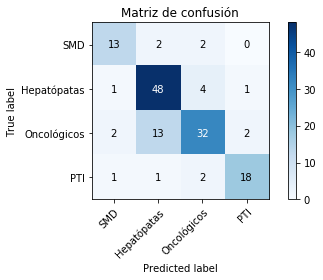

In [89]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()

In [90]:
session.close()

## Knn (Modelo)

In [29]:
# Creacion del modelo knn
x_data_train = tf.placeholder(shape=[None, 49], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, 49], dtype=tf.float32)

## Knn (distancia Manhattan)

cv_k_Scores: [0.7394366197183099, 0.7394366197183099, 0.7605633802816901, 0.7323943661971831, 0.7183098591549296, 0.7112676056338029, 0.7323943661971831, 0.7323943661971831, 0.7112676056338029, 0.7183098591549296, 0.7183098591549296, 0.6830985915492958, 0.6830985915492958, 0.6690140845070423, 0.6830985915492958, 0.6830985915492958, 0.676056338028169, 0.676056338028169, 0.676056338028169, 0.676056338028169]
20
20


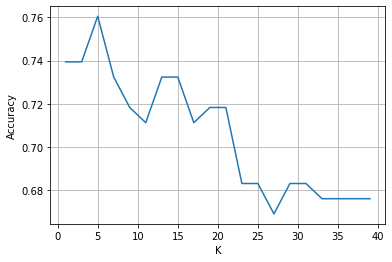

El valor óptimo de vecinos cercanos es: 5
El máximo valor de accuracy es: 0.7605633802816901


In [30]:
#Validacion cruzada para obtener una buena capacidad de generalizacion

k_values = range(1,40,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))


Se implementa la distancia Manhattan:valor absoluto de la diferencia entre los valores del vector de dos puntos de datos de x1 y x2.
El comando 'tf.expand_dims' añade una dimension extra a 'x_data_test' para que se puede llevar a cabo la resta.

In [31]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

Reemplazamos el valor de k que hemos obtenido tras realizar validación cruzada.

In [32]:
k = 5

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

- Con la funcion 'tf.nn.top_k()', se obtienes los mayores valores y los índices de KNN. El primer valor de retorno, son los valores de las distancias y por lo tanto se descartan ya que la función 'tf.negative()' hace que los valores sean negativos.


- Con la función 'tf.gather()' extraemos las etiquetas de entrenamiento asociadas a los índices de los vecinos más cercanos. Por tanto, top_k_label son las etiquetas codificadas.


- Con la función 'tf.reduce_sum()', se obtiene la suma de elementos.


- Con la funcion 'tf.argmax()' se obtienen las etiquetas predichas ya que con esta función se obtiene el índice del valor máximo.

## Knn (Manhattan) - Entrenamiento

In [33]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})

## Knn (Manhattan) - Validacion

In [34]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[12  3  1  1]
 [ 3 46  3  2]
 [ 3 11 32  3]
 [ 0  3  1 18]]


In [35]:
import collections

# Contamos cuantos pacientes hay en cada clase
collections.Counter(y_test_cls)

Counter({1: 54, 3: 22, 2: 49, 0: 17})

In [36]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))

0.7605633802816901


## Knn (Euclidea)

En este punto, se realiza validación cruzada tomando como medida de distancia la euclídea, ya que sabemos que KNN es sensible a la distancia que se considere (los vecinos cercanos pueden cambiar).

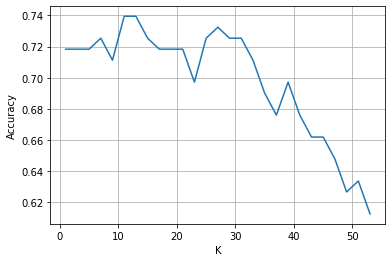

El valor óptimo de vecinos cercanos es: 11
El máximo valor de accuracy es: 0.7394366197183099


In [74]:
k_values = range(1,55,2)
cv_k_scores = []

# Definimos la distancia euclidea
euclidian_distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2))


for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))



plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))

Hemos obtenido como valor óptimo de vecinos cercanos el valor 7, por tanto creamos el modelo con este valor de k.

In [38]:
k = 11

# K puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

## Knn (Euclidea) - Entrenamiento

In [39]:
sess = tf.Session()
prediction_outcome_d2 = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})

## Knn (Euclidea) - Validacion

In [40]:
# Matriz de confusión 

con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome_d2 )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[12  1  3  1]
 [ 1 47  3  3]
 [ 0 18 29  2]
 [ 0  3  2 17]]


In [41]:
# Obtenemos la tasa de acierto
accuracy_d2 = 0
for pred, actual in zip(prediction_outcome_d2, y_test):
    if pred == np.argmax(actual):
        accuracy_d2 += 1
print('Tasa de acierto:',accuracy_d2 / len(prediction_outcome_d2))



Tasa de acierto: 0.7394366197183099


## Red neuronal : Perceptron multicapa

In [42]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

Obtenemos los valores de las etiquetas (0,1,2 y 3) ya que estaban codificadas, y para el entrenamiento de la red neuronal se requieren con dichos valores


In [75]:
y_train_cls = np.array([label.argmax() for label in y_train])


Validación cruzada - Tamaño del batch, épocas y optimizador

In [46]:
def build_model(optimizer):
  model = Sequential()
  model.add(Dense(32, input_shape=(x_train_s.shape[1],), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(4, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
  return model



In [47]:
parameters = parameters = {'batch_size': [16,32],
             'epochs':[100,300],
             'optimizer': ['adam', 'rmsprop']}

estimator = KerasClassifier(build_fn=build_model, verbose=0)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls)
grid_search.best_params_

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





/Users/nicolevizhnaycorral/anaconda3/envs/optimization/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}

Validación cruzada - Número de neuronas de entrada

Una vez que obtenemos los parámetros óptimos los definimos en el estimador y realizamos validación cruzada para obtener el número de neuronas a la entrada de las capas.

In [50]:
def build_model(l1, l2):
  model = Sequential()
  model.add(Dense(l1, input_shape=(x_train_s.shape[1],), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(l2, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(4, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

parameters = {'l1':[16,32,64],
             'l2':[16,23,64]}



In [51]:
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls) 
grid_search.best_params_

{'l1': 64, 'l2': 23}

Validación cruzada - Dropouts

Una vez tenemos los correspondientes valores de las capas, los sustituimos y buscamos con los porcentajes de dropout óptimos

In [56]:
#Dropouts

def build_model(d1, d2):
    model = Sequential()
    model.add(Dense(64, input_shape=(x_train_s.shape[1],), activation='relu'))
    model.add(Dropout(d1))
    model.add(Dense(23, activation='relu'))
    model.add(Dropout(d2))
    model.add(Dense(4, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

parameters = {'d1':[0.1,0.2,0.3],
             'd2':[0.1,0.2,0.3]}



In [57]:
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls)
grid_search.best_params_

{'d1': 0.3, 'd2': 0.3}

Una vez que hemos obtenido los parámetros libres a través de validación cruzada creamos el modelo definitivo

In [67]:
# Crearemos una serie de capas de neuronas secuenciales
model = Sequential()

# Capa de entrada con 49 neuronas
# La primera capa oculta tiene 64 neuronas
model.add(Dense(64, input_shape=(x_train_s.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.3))

# Agregamos una capa con 4 neuronas de salida y función de activación sigmoide
model.add(Dense(4, activation='sigmoid'))


In [68]:
# Función de pérdida: binary_crossentropy, optimizador= adam, definimos exactitud como métrica

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [69]:
model.fit(x_train_s, y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 508 samples, validate on 57 samples
Epoch 1/100
508/508 [==============================] - 4s 8ms/step - loss: 1.4173 - accuracy: 0.2854 - val_loss: 1.3254 - val_accuracy: 0.4211
Epoch 2/100
508/508 [==============================] - 0s 347us/step - loss: 1.2701 - accuracy: 0.4232 - val_loss: 1.2427 - val_accuracy: 0.4912
Epoch 3/100
508/508 [==============================] - 0s 278us/step - loss: 1.2253 - accuracy: 0.4626 - val_loss: 1.1676 - val_accuracy: 0.5088
Epoch 4/100
508/508 [==============================] - 0s 353us/step - loss: 1.1392 - accuracy: 0.5315 - val_loss: 1.1078 - val_accuracy: 0.5263
Epoch 5/100
508/508 [==============================] - 0s 282us/step - loss: 1.0605 - accuracy: 0.5709 - val_loss: 1.0539 - val_accuracy: 0.5614
Epoch 6/100
508/508 [==============================] - 0s 358us/step - loss: 1.0247 - accuracy: 0.6024 - val_loss: 1.0068 - val_accuracy: 0.5965
Epoch 7/100
508/508 [==============================] - 0s 361us/step - loss: 1.0222 - a

Epoch 57/100
508/508 [==============================] - 0s 313us/step - loss: 0.4241 - accuracy: 0.8366 - val_loss: 0.8647 - val_accuracy: 0.6842
Epoch 58/100
508/508 [==============================] - 0s 342us/step - loss: 0.3791 - accuracy: 0.8622 - val_loss: 0.8802 - val_accuracy: 0.6842
Epoch 59/100
508/508 [==============================] - 0s 308us/step - loss: 0.4426 - accuracy: 0.8268 - val_loss: 0.8707 - val_accuracy: 0.6842
Epoch 60/100
508/508 [==============================] - 0s 277us/step - loss: 0.3813 - accuracy: 0.8406 - val_loss: 0.8797 - val_accuracy: 0.6842
Epoch 61/100
508/508 [==============================] - 0s 255us/step - loss: 0.3982 - accuracy: 0.8504 - val_loss: 0.9020 - val_accuracy: 0.6842
Epoch 62/100
508/508 [==============================] - 0s 308us/step - loss: 0.3876 - accuracy: 0.8366 - val_loss: 0.8951 - val_accuracy: 0.6842
Epoch 63/100
508/508 [==============================] - 0s 366us/step - loss: 0.3473 - accuracy: 0.8681 - val_loss: 0.8897 -

In [70]:
# Evaluamos en el conjunto de entrenamiento
scores = model.evaluate(x_train_s, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

565/565 [==============================] - 0s 481us/step

accuracy: 93.27%


In [71]:
# Evaluamos el modelo en el conjunto de validacion
print('\n# Evaluación en el conjunto de validación')
scores = model.evaluate(x_test_s, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Obtenemos las predicciones
predictions_mlp_codif = model.predict(x_test_s).round()

# Obtenemos las predicciones con valores 0,1,2 y 3 ya que estaban codificadas
predictions_mlp = np.array([label.argmax() for label in predictions_mlp_codif])

#print(predictions_mlp)


# Evaluación en el conjunto de validación
142/142 [==============================] - 0s 173us/step

accuracy: 78.87%


In [72]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=predictions_mlp )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[16  1  0  0]
 [20 31  2  1]
 [18  4 25  2]
 [ 5  0  0 17]]


## Red neuronal sobre bases de datos TEST

In [ ]:
# Para obtener las predicciones eliminamos el diagnostico y el identificado de número

x_test_db_smd = db_smd_test.drop(['Diagnosis'], axis=1)
x_test_db_hpt = db_hpt_test.drop(['Diagnosis'], axis=1)
x_test_db_onc = db_onc_test.drop(['Diagnosis'], axis=1)
x_test_db_pti = db_pti_test.drop(['Diagnosis'], axis=1)

In [ ]:
# Estandarizamos las bases de datos

x_test_db_smd = scaler.transform(x_test_db_smd)
x_test_db_hpt = scaler.transform(x_test_db_hpt)
x_test_db_onc = scaler.transform(x_test_db_onc)
x_test_db_pti = scaler.transform(x_test_db_pti)

In [ ]:
# Probamos con db_smd
predictions_mlp_codif_db_smd = model.predict(x_test_db_smd).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_smd = np.array([label.argmax() for label in predictions_mlp_codif_db_smd])

print(predictions_mlp_codif_db_smd)

In [ ]:
# Probamos con db_hpt
predictions_mlp_codif_db_hpt = model.predict(x_test_db_hpt).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_hpt = np.array([label.argmax() for label in predictions_mlp_codif_db_hpt])

print(predictions_mlp_codif_db_hpt)

In [ ]:
# Probamos con x_test_db_onc

predictions_mlp_codif_db_onc = model.predict(x_test_db_onc).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_onc = np.array([label.argmax() for label in predictions_mlp_codif_db_onc])

print(predictions_mlp_codif_db_onc)


In [ ]:
# Probamos con x_test_db_pti

predictions_mlp_codif_db_pti = model.predict(x_test_db_pti).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_pti = np.array([label.argmax() for label in predictions_mlp_codif_db_pti])

print(predictions_mlp_codif_db_pti)

# Etapa 3: Seleccion de caracteristicas

## Metodo de filtrado: Prueba F de Fisher (F)

In [ ]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
#Algoritmo univariante de prueba F

n_variables = 10

selector_f = SelectKBest(f_classif, k= n_variables)

selection_f = selector_f.fit(x_train,y_train)

atrib_matrix_f = selection_f.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_f)

selected_atributes_f = []

for i in range(len(atrib_names)):
    if atrib_matrix_f[i] == True:
        selected_atributes_f.append(atrib_names[i])
        
print(selected_atributes_f)

## Metodo de empaquetamiento: Eliminacion recursiva de atributos (ERA)

In [ ]:
#Eliminacion recursiva de atributos

selector_elim = ExtraTreesClassifier()

era = RFE(selector_elim, 49)

selection_era = era.fit(x_train, y_train)

atrib_matrix_era = selection_era.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_era)

selected_atributes_era = []

for i in range(len(atrib_names)):
    if atrib_matrix_era[i] == True:
        selected_atributes_era.append(atrib_names[i])
        
print(selected_atributes_era)

# Bases de datos tras seleccion de caracteristicas (F y ERA)

In [ ]:
#Base de datos tras F de Fisher

x = db_final.drop(['Diagnosis'],axis=1)
x_f = x[selected_atributes_f]
y_f = db_final['Diagnosis']
y_vals_f = np.eye(len(set(y_f)))[y_f]

x_f.info()
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_vals_f, test_size=0.2)

In [ ]:
#Base de datos tras ERA
x = db_final.drop(['Diagnosis'],axis=1)
x_era = x[selected_atributes_era]
y_era = db_final['Diagnosis']
y_vals_era = np.eye(len(set(y_era)))[y_era]

x_era.info()
x_train_era,x_test_era,y_train_era,y_test_era = train_test_split(x_era,y_vals_era, test_size=0.2)

## Seleccion de caracteristicas : Regresion logistica

In [ ]:
#Crear modelo
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension

y_test_cls_f = np.array([label.argmax() for label in y_test_f])
y_test_cls_era = np.array([label.argmax() for label in y_test_era])

In [ ]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
#Entrenamiento con F de Fisher
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_f, y_true: y_train_f}

        session.run(optimizer, feed_dict=feed_dict_train)


In [ ]:
#Validacion con F de Fisher
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_f,
                  y_true: y_test_f,
                  y_true_cls: y_test_cls_f}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls_f

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()
